# Random Forest

## Data Importing

In [2]:
import pandas as pd

# load dataset
df = pd.read_csv('cleaned_Suicide_Detection_with_Token.csv')  


## Data Spliting

In [3]:
from sklearn.model_selection import train_test_split

# split into training and testing sets (70 30)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.3, random_state=42)


## Label Encoding

In [4]:
# encode labels (suicide=1 non-suicide=0)
y_train = y_train.map({'suicide': 1, 'non-suicide': 0})
y_test = y_test.map({'suicide': 1, 'non-suicide': 0})


## TFIDF Vectorization

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


## Random Forest (Base Model)

In [39]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 100)
random_forest.fit(X_train_tfidf, y_train)


RandomForestClassifier(random_state=100)

## Classification Report

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# predict test 
y_pred = random_forest.predict(X_test_tfidf)

#  training accuracy
trainAccuracy = random_forest.score(X_train_tfidf, y_train)
print("Training Accuracy:", trainAccuracy)

# training loss (MISC)
training_loss = random_forest.score(X_train_tfidf, y_train)
print("Training Loss (MISC):", 1 - training_loss)

# test accuracy
testAccuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testAccuracy)

# precison recall f1score
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9997271182446261
Training Loss (MISC): 0.00027288175537387716
Testing Accuracy: 0.9030316185514796
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     34504
           1       0.90      0.91      0.90     34601

    accuracy                           0.90     69105
   macro avg       0.90      0.90      0.90     69105
weighted avg       0.90      0.90      0.90     69105



## Hyperparameter Tuning with Grid Search

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [15, 30, 45, 60, 75, 85],  # Maximum depth of the tree
    'min_samples_split': [5, 10, 15, 20],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 3, 4, 5]  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
predicted = best_model.predict(X_test_tfidf)

# Calculate training accuracy
train_accuracy = best_model.score(X_train_tfidf, y_train)
print("Training Accuracy After Tuning:", train_accuracy)

# Calculate testing accuracy
accuracy = metrics.accuracy_score(y_test, predicted)
print("Testing Accuracy After Tuning:", accuracy)

# Classification report
print(metrics.classification_report(y_test, predicted))


Best Parameters: {'max_depth': 85, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
Best Score: 0.8883603793906474
Accuracy: 0.8921351566456841
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     34504
           1       0.89      0.89      0.89     34601

    accuracy                           0.89     69105
   macro avg       0.89      0.89      0.89     69105
weighted avg       0.89      0.89      0.89     69105



In [99]:
# Calculate training accuracy
train_accuracy = best_model.score(X_train_tfidf, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.93374555016683


## Evaluation Matrix (Tunned Model)

Confusion Matrix:
[[30873  3631]
 [ 3823 30778]]


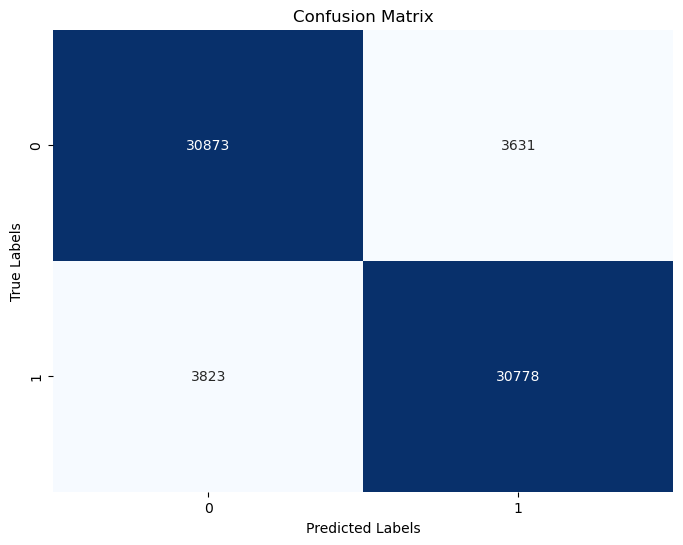

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix
conf_matrix = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


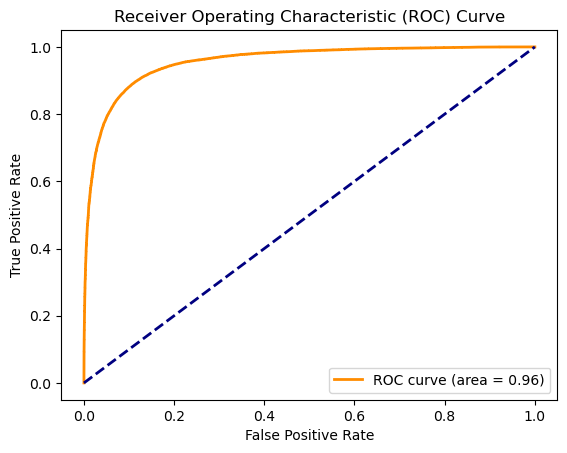

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve 
y_pred_proba = best_model.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [9]:
# save model
import joblib

joblib.dump(random_forest, 'randomForest_model.pkl')


['randomForest_model.pkl']